In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.lines import Line2D
import geopandas as gpd

from geo_northarrow import add_north_arrow


In [2]:
output_dir = "/Users/liting/Documents/GitHub/r_chagasM/output/"

In [3]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
north_america = world[world['continent'] == 'North America']

/var/folders/dx/4fv665g177x973sw3f557wx80000gq/T/ipykernel_29028/1438572287.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


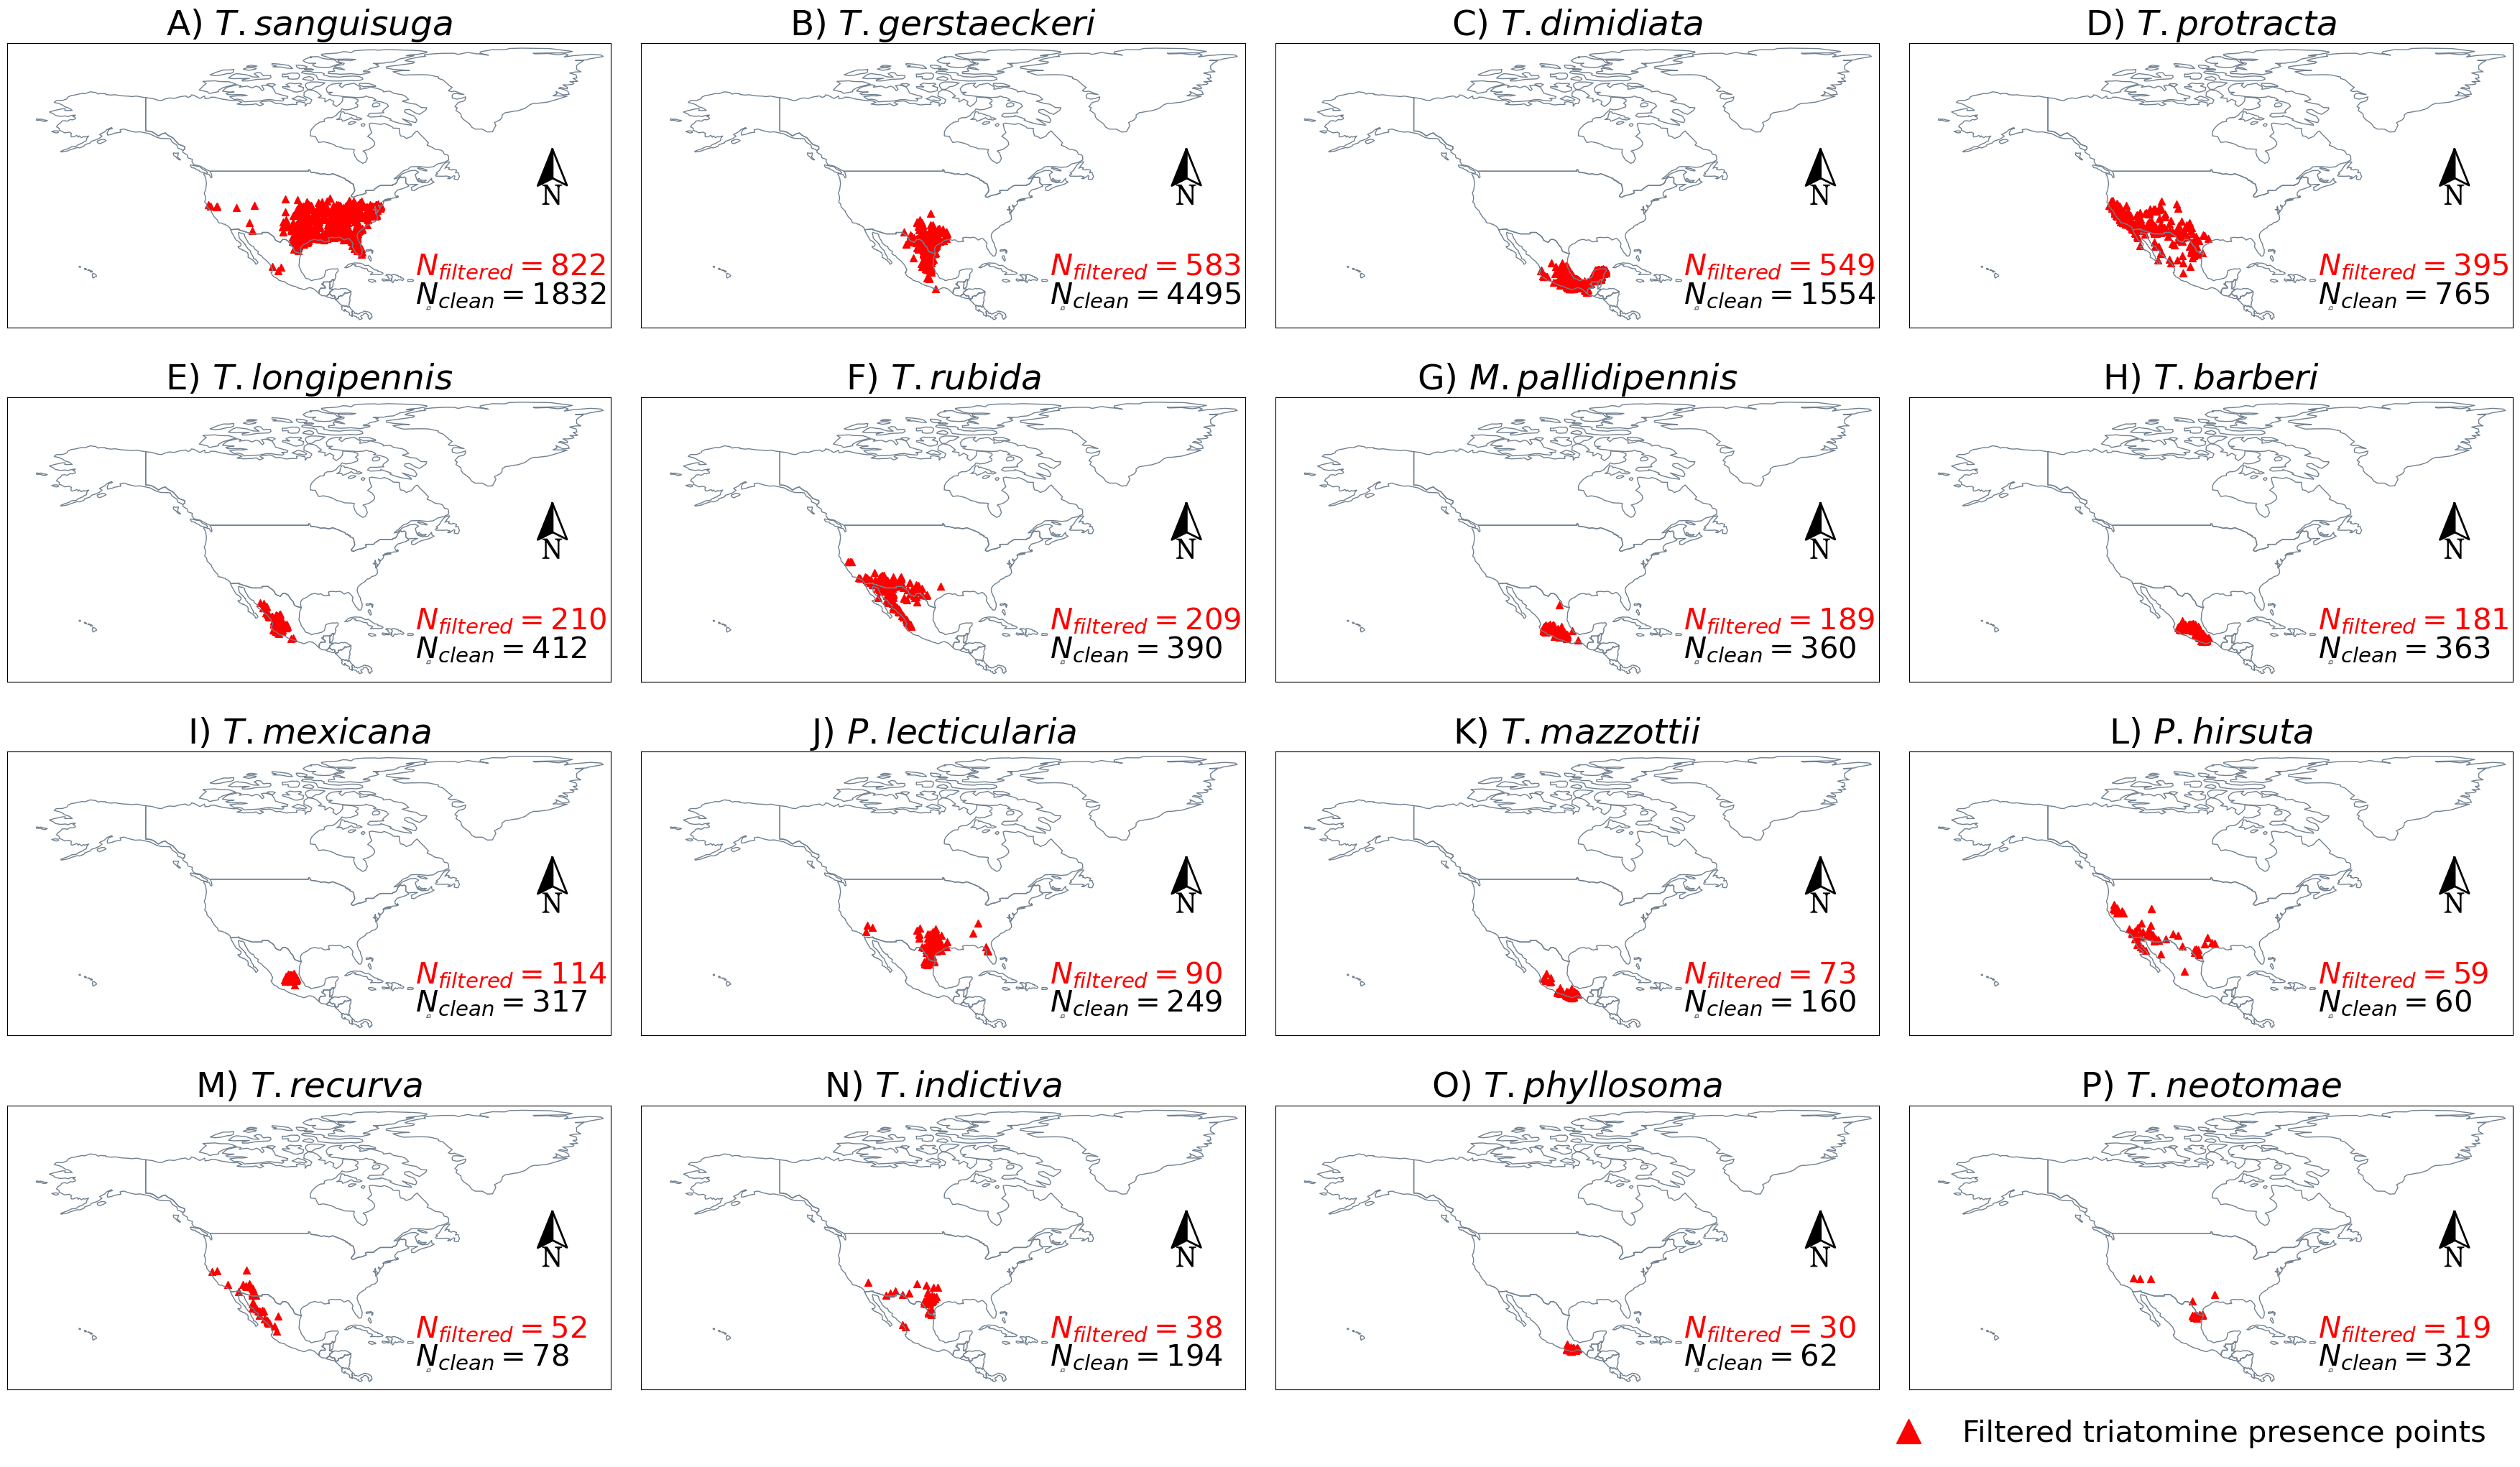

In [4]:
fig, ax = plt.subplots(4,4, figsize=(45,32))

xlim = [-180,-10]
ylim = [5,85]


sp_rarefied_name_list = ['san','ger','dim','pro','lon','rub','pal','bar','mex','lec','maz','hir','rec','ind','phy','neo']
sp_rarefied_name_list_full = ['T. sanguisuga','T. gerstaeckeri','T. dimidiata','T. protracta','T. longipennis','T. rubida','M. pallidipennis','T. barberi','T. mexicana',' P. lecticularia','T. mazzottii','P. hirsuta',' T. recurva',' T. indictiva','T. phyllosoma','T. neotomae']
label_list = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P']
bug_name_list = ["sanguisuga","gerstaeckeri","dimidiata","protracta","longipennis","rubida",'pallidipennis','barberi',"mexicana","lecticularia","mazzottii",'hirsuta',"recurva","indictiva",'phyllosoma',"neotomae"]
for i in range(len(sp_rarefied_name_list)):
    
    ax_0 = i // 4
    ax_1 = i % 4



    north_america.boundary.plot(ax=ax[ax_0,ax_1], color = 'slategrey',linewidth=1)

    this_title = sp_rarefied_name_list_full[i]
    ax[ax_0,ax_1].set_title(label_list[i]+') '+'$\it{%s}$'%this_title,fontsize=35,y=1.01)

    sp_path_raw = "/Users/liting/Documents/GitHub/Clean_species_data/data/edit_final_data/northAmerica_"+bug_name_list[i]+'.csv'
    pre_select_raw = pd.read_csv(sp_path_raw)
    number_points_raw = len(pre_select_raw)

    sp_path_filter = "/Users/liting/Documents/GitHub/Clean_species_data/data/spthin/"+sp_rarefied_name_list[i]+'.csv'
    pre_select_filter = pd.read_csv(sp_path_filter)
    gdf4 = gpd.GeoDataFrame(pre_select_filter, geometry=gpd.points_from_xy(pre_select_filter.DecimalLongitude, pre_select_filter.DecimalLatitude))
    gdf4.plot(marker='^', ax=ax[ax_0,ax_1], color='red', markersize=50)
    number_points_filtered = len(pre_select_filter)


    ax[ax_0,ax_1].text(x=-65, y=12, s='$N_{clean}=$'+str(number_points_raw), fontsize=30)
    ax[ax_0,ax_1].text(x=-65, y=20, s='$N_{filtered}=$'+str(number_points_filtered), fontsize=30,color="red")
    ax[ax_0,ax_1].tick_params(left = False, right = False , labelleft = False ,labelbottom = False, bottom = False)
    ax[ax_0,ax_1].set_xlim(xlim)
    ax[ax_0,ax_1].set_ylim(ylim)
    # ax[ax_0,ax_1].set_ylabel("latitude",fontsize=25)
    # ax[ax_0,ax_1].set_xlabel("longitude",fontsize=25)
    ax[ax_0,ax_1].set_aspect('equal')
    add_north_arrow(ax=ax[ax_0,ax_1], scale=.75, xlim_pos=.9025, ylim_pos=.5, color='#000', text_scaler=4, text_yT=-1.25)


    
    

plt.subplots_adjust(hspace=-0.5)
plt.subplots_adjust(wspace=0.05)

patch3 = Line2D([0], [0], marker='^',color='red', label='Filtered triatomine presence points',linestyle='None',markersize=25 )
plt.legend(handles=[patch3],fontsize=30,loc='lower right', frameon=False,bbox_to_anchor=[1, -0.3])
plt.savefig(output_dir+"/figures/triatomine_input_edit.png",dpi=300,bbox_inches='tight')

In [5]:
get_num1 = 0
get_num2 = 0
for i in range(len(sp_rarefied_name_list)):
    sp_path_raw = "/Users/liting/Documents/GitHub/Clean_species_data/data/edit_final_data/northAmerica_"+bug_name_list[i]+'.csv'
    pre_select_raw = pd.read_csv(sp_path_raw)
    number_points_raw = len(pre_select_raw)
    get_num1 += number_points_raw

    sp_path_filter = "/Users/liting/Documents/GitHub/Clean_species_data/data/spthin/"+sp_rarefied_name_list[i]+'.csv'
    pre_select_filter = pd.read_csv(sp_path_filter)
    number_points_filtered = len(pre_select_filter)
    get_num2 += number_points_filtered


print(get_num1)
print(get_num2)


    
    

11323
3613
